In [30]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
# load dataset
x, y = load_iris(return_X_y=True)

### - Logistic Regression

In [31]:
# Do not edit the codes in this cell
# We use 100 samples and 2 features for logistic regression function
x_lr = x[:100, :2] # class 0 and 1 balanced
y_lr = y[:100]

In [32]:
#Splitting the data into train and test
from math import exp
import random as rand
#train_test_split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x_lr, y_lr, test_size=0.2, random_state=42)

def train_test_split(X, y):
    ind=np.arange(0,len(X),1)
    np.random.shuffle(ind)
    training_size=0.8*len(X)
    X_train=X[ind[0:int(training_size)]]
    X_test=X[ind[int(training_size):len(ind)]]
    y_train=y[ind[0:int(training_size)]]
    y_test=y[ind[int(training_size):len(ind)]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(x_lr, y_lr)
X_train=np.insert(X_train,0,1,axis=1)
X_test=np.insert(X_test,0,1,axis=1)
theta=np.zeros(3)
print (X_train[0])

[1.  5.4 3.4]


In [33]:
#sigmoid function for logistic regression
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [34]:
#calculate error and stochastic gradient descent error
def calculate_error(theta, X, y):
    ycap=sigmoid(np.dot(np.transpose(theta),X))
    error=((ycap-y)**2)/2
    return error

def calc_grad_desc_error(theta, X, y):
    ycap=sigmoid(np.dot(np.transpose(theta),X))
    gd_error=(ycap-y)*(ycap)*(1-ycap)*(X)
    return gd_error


In [35]:
#sigmoid function
def sigmoid1(coefs, X):
    s = np.dot(X,coefs)
    s = 1 / (1 + np.exp(-s))
    return s

#predict function for labels
def predict1(coefs, X):
    predict_labels=sigmoid1(coefs, X)
    for i,j in enumerate(predict_labels):
        if j < 0.5:
            predict_labels[i] = 0
        else:
            predict_labels[i] = 1
    return predict_labels

In [36]:
#stochastic gradient descent -  function to calculate coefficients
def coef_sgd(theta,X,y,ln_rate,epoch):
    n_theta=theta
    error=0
    for c in range (0,epoch,1):
        ind=rand.randint(0,79)
        data=X[ind]
        label=y[ind]
        pred=sigmoid(np.dot(np.transpose(n_theta),data))
#        pred=sigmoid(theta,X)
        if(pred>0.5 and label==1):
            error=error
        elif(pred<0.5 and label==0):
            error=error
        else:
            error=calculate_error(n_theta,data,label)
            gd_error=calc_grad_desc_error(n_theta,data,label)
            n_theta=n_theta-ln_rate*gd_error 
    return n_theta

In [37]:
#estimate logistic regression coefficicents using stochastic gradient descent and cross entropy loss
def cross_entropy_loss(coefs, x, y):
    n = x.shape[0]
    cross_loss = -(1 / n) * np.sum(y * np.log(sigmoid1(coefs, x)) + (1 - y) * np.log(1 - sigmoid1(coefs, x)))
    return cross_loss

In [38]:
#logistic regression function
def logistic_regression(theta,X_train,y_train,X_test,l_rate,n_epoch):
#    predictions = []
    coefs = coef_sgd(theta,X_train,y_train,l_rate,n_epoch)
#    for row in X_test:
#        ycap = predict(coefs, row)
#        ycap = round(ycap)
#        predictions.append(ycap)
    return coefs

In [39]:
#function to calculate accuracy
def accuracy(y_actual, y_predicted):
    correct = 0
    for i in range(len(y_actual)):
        if y_actual[i] == y_predicted[i]:
            correct = correct + 1
        accu_score = correct / float(len(y_actual)) * 100.0
    return accu_score

In [40]:
coefficients = logistic_regression(theta,X_train,y_train,X_test,0.01,1000)
print("Final theta values are",coefficients)
predict_labels = predict1(coefficients, X_test)
accu_score = accuracy(y_test, predict_labels)
cross_loss = cross_entropy_loss(coefficients, X_train, y_train)
print("Cross Entropy loss ",cross_loss)
print("Predicted labels are :",predict_labels)
print("Accuracy_score is :", accu_score)

Final theta values are [-0.00639401  0.02831085 -0.04768857]
Cross Entropy loss  0.6788957922342944
Predicted labels are : [1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0.]
Accuracy_score is : 100.0


In [41]:
#The accuracy result is above 90% so it indeed is a good accuracy score

In [42]:
#draw model
def draw_model(coefficients,X,y):
    x_val = [np.min(X[:, 0]-1), np.max(X[:, 1]+3)]
    y_val = - (coefficients[0] + np.dot(coefficients[1], x_val)) / coefficients[2]
    plt.clf()
    data = np.c_[X,y]
    iris_setosa = data[np.where(data[:,2] == 0)]
    iris_versicolor = data[np.where(data[:,2] == 1)]
    plt.title("Iris plot")
    plt.xlabel("Sepal-length")
    plt.ylabel("Sepal-Width")
    plt.scatter(iris_setosa[:,0],iris_setosa[:,1],label = "Setosa")
    plt.scatter(iris_versicolor[:,0],iris_versicolor[:,1],label = "Versicolor")
    plt.plot(x_val, y_val,label='Decision Boundary line')
    plt.legend()
    plt.show()
    


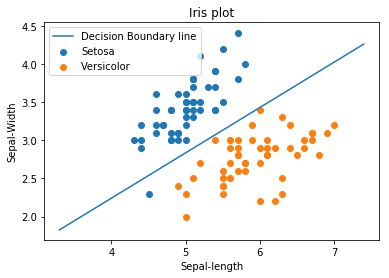

In [43]:
x, y = load_iris(return_X_y=True)
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]
draw_model(coefficients, x, y)    


### - Naive Bayes Classifier

In [44]:
#cross_validation_split
def train_test_split(X, y):
    ind=np.arange(0,len(X),1)
    np.random.shuffle(ind)
    x_k1=X[ind[0:30]]
    x_k2=X[ind[30:60]]
    x_k3=X[ind[60:90]]
    x_k4=X[ind[90:120]]
    x_k5=X[ind[120:150]]
    y_k1=y[ind[0:30]]
    y_k2=y[ind[30:60]]
    y_k3=y[ind[60:90]]
    y_k4=y[ind[90:120]]
    y_k5=y[ind[120:150]]
#    training_size=0.8*len(X)
#    X_train=X[ind[0:int(training_size)]]
#    X_test=X[ind[int(training_size):len(ind)]]
#    y_train=y[ind[0:int(training_size)]]
#    y_test=y[ind[int(training_size):len(ind)]]
#    print(y_k2.shape)
    return x_k1, x_k2, x_k3, x_k4, x_k5, y_k1, y_k2, y_k3, y_k4, y_k5

x, y = load_iris(return_X_y=True)
x_k1, x_k2, x_k3, x_k4, x_k5, y_k1, y_k2, y_k3, y_k4, y_k5 = train_test_split(x, y)
print(y_k5)

[2 2 2 0 0 0 2 2 1 0 0 2 1 0 2 0 0 1 0 1 0 2 1 1 1 0 2 1 0 0]


In [45]:
def separate_class(X, y):
    sep_label = dict()
    outcomes=0
    for j in range(len(y)):
        outcomes=outcomes+1
    for i in range(len(X)):
        vect = X[i]
        class_label = y[i]
        if (class_label not in sep_label):
            sep_label[class_label] = list()
        sep_label[class_label].append(vect)
    return sep_label

In [46]:
from math import exp
from math import pi
from math import sqrt
# Calculate the mean of features
def mean(X):
    return sum(X)/float(len(X))
 
# Calculate the standard deviation of a list of numbers
def stdev(X):
    average = mean(X)
    variance = sum([(x-average)**2 for x in X]) / float(len(X)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each feature 
def summarize_dataset(X):
    mean_stdev_len = [(mean(column), stdev(column), len(column)) for column in zip(*X)]
    return mean_stdev_len

# Split dataset by class and calculate mean, variance and std deviation for each row
def summarize_class(X, y):
    separated = separate_class(X, y)
    summaries = dict()
    for class_label, rows in separated.items():
        summaries[class_label] = summarize_dataset(rows)
    return summaries

#Gaussian probability function for x
def gaussian_prob(x, mean, stdev):
    expo = exp(-((x-mean)**2 / (2 * stdev**2 )))
    gauss = (1 / (sqrt(2 * pi) * stdev)) * expo
    return gauss

# Calculate the probabilities of predicting each class for a given row
def class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_label, class_summaries in summaries.items():
        probabilities[class_label] = summaries[class_label][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_label] *= gaussian_prob(row[i], mean, stdev)
    return probabilities

# Predict the class for a given row
def predict(summaries, row):
    probabilities = class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_label, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_label
    return best_label

# Naive Bayes
def naive_bayes(X_train, X_test, y_train, y_test):
    summarize = summarize_class(X_train, y_train)
    predictions = list()
    for row in X_test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)


#function to calculate accuracy
def accurate(y_actual, y_predicted):
    correct = 0
    accu_score1 = 0.0
    for i in range(len(y_actual)):
        if y_actual[i] == y_predicted[i]:
            correct = correct + 1
        accu_score1 = correct / float(len(y_actual)) * 100.0
    return accu_score1
#    return correct / float(len(y_actual)) * 100.0

predictions_k1 = naive_bayes(x_k1, x_k2, y_k1, y_k2)
accu_score_k1 = accurate(y_k2, predictions_k1)
predictions_k2 = naive_bayes(x_k2, x_k3, y_k2, y_k3)
accu_score_k2 = accurate(y_k3, predictions_k2)
predictions_k3 = naive_bayes(x_k3, x_k4, y_k3, y_k4)
accu_score_k3 = accurate(y_k4, predictions_k3)
predictions_k4 = naive_bayes(x_k4, x_k5, y_k4, y_k5)
accu_score_k4 = accurate(y_k5, predictions_k4)
predictions_k5 = naive_bayes(x_k5, x_k1, y_k5, y_k1)
accu_score_k5 = accurate(y_k1, predictions_k5)






print(predictions_k1)
print(predictions_k2)
print(predictions_k3)
print(predictions_k4)
print(predictions_k5)
print(accu_score_k1)
print(accu_score_k2)
print(accu_score_k3)
print(accu_score_k4)
print(accu_score_k5)
average_accuracy = (accu_score_k1 + accu_score_k2 + accu_score_k3 + accu_score_k4 + accu_score_k5)/5
print("Average accuracy score is ",average_accuracy)


[1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 2]
[0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2]
[2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0]
[2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2]
96.66666666666667
96.66666666666667
90.0
100.0
93.33333333333333
Average accuracy score is  95.33333333333334


In [47]:
#The accuracy result is above 90% so it indeed is a good score